In [1]:
#Carga de datos y unificacion de datos
import pandas as pd

# Cargar cada archivo CSV desde la subcarpeta 'datos'
df_2020_2024 = pd.read_csv("datos/informe_horario_para_usuarios (2020-2024).csv", delimiter=';')
df_2015_2019 = pd.read_csv("datos/informe_horario_para_usuarios (2015-2019).csv", delimiter=';')
df_2010_2014 = pd.read_csv("datos/informe_horario_para_usuarios (2010-2014).csv", delimiter=';')
df_2005_2009 = pd.read_csv("datos/informe_horario_para_usuarios (2005-2009).csv", delimiter=';')

# Combinar los DataFrames en uno solo
df = pd.concat([df_2020_2024, df_2015_2019, df_2010_2014, df_2005_2009], ignore_index=True)



C:\Users\Pablo\AppData\Local\Temp\ipykernel_16644\942961044.py:8: DtypeWarning: Columns (3,6,9,12,14,20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2005_2009 = pd.read_csv("datos/informe_horario_para_usuarios (2005-2009).csv", delimiter=';')


In [2]:
#Análisis preliminar
df.describe

<bound method NDFrame.describe of        CODEST     FECHA   HORA   DPV  DVMED  HRMAXABS  HRMAX  HRMED  HRMINABS  \
0        CA52  01/01/20  00:00  ,021  247,3       NaN   98,3   97,8       NaN   
1        CA52  01/01/20  01:00  ,035  270,2       NaN   97,7   96,5       NaN   
2        CA52  01/01/20  02:00  ,052  286,9       NaN   95,4   94,9       NaN   
3        CA52  01/01/20  03:00  ,065  285,8       NaN   94,6   93,5       NaN   
4        CA52  01/01/20  04:00   ,08  285,6       NaN     93     92       NaN   
...       ...       ...    ...   ...    ...       ...    ...    ...       ...   
173664   CA52  31/12/09  19:00  ,713  252,5       NaN  63,64  55,93       NaN   
173665   CA52  31/12/09  20:00  ,803  263,4       NaN  50,91  50,27       NaN   
173666   CA52  31/12/09  21:00  ,853  262,3       NaN  49,02  45,97       NaN   
173667   CA52  31/12/09  22:00  ,798  267,3       NaN  55,89  46,37       NaN   
173668   CA52  31/12/09  23:00  ,611  285,1       NaN   56,1  54,91       N

In [3]:
df.dtypes

CODEST          object
FECHA           object
HORA            object
DPV             object
DVMED           object
HRMAXABS       float64
HRMAX           object
HRMED           object
HRMINABS       float64
HRMIN           object
PRECMAX        float64
PREC            object
DEWPT           object
RADACU         float64
RADMAX          object
RADMED          object
RRMAX          float64
RRMED          float64
RVIENTO         object
TMAXABS        float64
TMAX            object
TMED            object
TMINABS        float64
TMIN            object
VVMAX           object
VVMED           object
Unnamed: 26    float64
dtype: object

In [4]:
# Resumen estadístico y número de valores nulos por columna
resumen = df.describe(include='all').transpose()
resumen['Valores Nulos'] = df.isnull().sum()
resumen['Número de Datos'] = df.count()
resumen['Porcentaje de Valores Nulos'] = (df.isnull().sum() / len(df)) * 100

print(resumen)


              count unique       top    freq mean  std  min  25%  50%  75%  \
CODEST       173669      1      CA52  173669  NaN  NaN  NaN  NaN  NaN  NaN   
FECHA        173669   7196  03/04/07      48  NaN  NaN  NaN  NaN  NaN  NaN   
HORA         173669     48     03:00    7190  NaN  NaN  NaN  NaN  NaN  NaN   
DPV          138612   4185         0    1141  NaN  NaN  NaN  NaN  NaN  NaN   
DVMED        173577  16814         0     337  NaN  NaN  NaN  NaN  NaN  NaN   
HRMAXABS        0.0    NaN       NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
HRMAX        138582   5008       100    1304  NaN  NaN  NaN  NaN  NaN  NaN   
HRMED        173236  10092      99,9    1292  NaN  NaN  NaN  NaN  NaN  NaN   
HRMINABS        0.0    NaN       NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
HRMIN        138562   5259       100     807  NaN  NaN  NaN  NaN  NaN  NaN   
PRECMAX         0.0    NaN       NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
PREC         173667    345         0  169099  NaN  NaN  NaN  NaN

In [5]:
# Detectar filas duplicadas
duplicados = df.duplicated()

# Mostrar las filas duplicadas
duplicados_df = df[duplicados]

print(f"Hay {len(duplicados_df)} filas duplicadas. Aquí están:")
print(duplicados_df)




Hay 21 filas duplicadas. Aquí están:
      CODEST     FECHA   HORA    DPV  DVMED  HRMAXABS  HRMAX  HRMED  HRMINABS  \
40897   CA52  31/08/24  00:00    ,45  19,33       NaN   87,5   85,9       NaN   
40899   CA52  31/08/24  01:00    ,59  11,77       NaN   82,9   81,8       NaN   
40901   CA52  31/08/24  02:00   ,547  22,81       NaN   83,4     83       NaN   
40903   CA52  31/08/24  03:00   ,673  26,14       NaN   80,6   78,8       NaN   
40905   CA52  31/08/24  04:00   ,576  348,8       NaN   83,5   81,3       NaN   
40907   CA52  31/08/24  05:00   ,623  340,1       NaN   80,8   79,3       NaN   
40909   CA52  31/08/24  06:00   ,702  330,8       NaN     78   76,7       NaN   
40911   CA52  31/08/24  07:00   ,935  14,29       NaN   75,2   71,9       NaN   
40913   CA52  31/08/24  08:00   ,952  33,87       NaN   74,8   73,3       NaN   
40915   CA52  31/08/24  09:00  1,174  52,44       NaN   73,2   69,2       NaN   
40917   CA52  31/08/24  10:00  1,327  52,81       NaN  68,05  66,39     

In [6]:
# Eliminar filas duplicadas
df_limpio = df.drop_duplicates()

# Comprobar el tamaño del DataFrame después de eliminar duplicados
print(f"El DataFrame limpio tiene {df_limpio.shape[0]} filas y {df_limpio.shape[1]} columnas.")


El DataFrame limpio tiene 173648 filas y 27 columnas.


In [7]:
# Contar valores nulos por columna
valores_nulos = df_limpio.isnull().sum()

# Mostrar los resultados
print(valores_nulos)


CODEST              0
FECHA               0
HORA                0
DPV             35057
DVMED              92
HRMAXABS       173648
HRMAX           35087
HRMED             433
HRMINABS       173648
HRMIN           35107
PRECMAX        173648
PREC                2
DEWPT           35058
RADACU         173648
RADMAX          34659
RADMED              2
RRMAX          173648
RRMED          173648
RVIENTO            91
TMAXABS        173648
TMAX            34718
TMED               64
TMINABS        173648
TMIN            34735
VVMAX           34748
VVMED              91
Unnamed: 26    173648
dtype: int64


In [8]:
# Eliminar columnas con más del 50% de valores nulos
threshold = len(df_limpio) * 0.5
df_limpio = df_limpio.dropna(thresh=threshold, axis=1)

# Comprobar de nuevo los valores nulos
print(df_limpio.isnull().sum())


CODEST         0
FECHA          0
HORA           0
DPV        35057
DVMED         92
HRMAX      35087
HRMED        433
HRMIN      35107
PREC           2
DEWPT      35058
RADMAX     34659
RADMED         2
RVIENTO       91
TMAX       34718
TMED          64
TMIN       34735
VVMAX      34748
VVMED         91
dtype: int64


In [9]:
df_limpio

,CODEST,FECHA,HORA,DPV,DVMED,HRMAX,HRMED,HRMIN,PREC,DEWPT,RADMAX,RADMED,RVIENTO,TMAX,TMED,TMIN,VVMAX,VVMED
0,CA52,01/01/20,00:00,",021","247,3","98,3","97,8","97,3",0,"6,139",0,0,"4,3416","6,908","6,459","6,032","2,176","1,206"
1,CA52,01/01/20,01:00,",035","270,2","97,7","96,5","95,8",0,"6,545",0,0,"5,2164","7,38","7,05","6,639","3,753","1,449"
2,CA52,01/01/20,02:00,",052","286,9","95,4","94,9","94,6",0,"6,386",0,0,"9,2988","7,31","7,14","7,04","4,155","2,583"
3,CA52,01/01/20,03:00,",065","285,8","94,6","93,5","92,3",0,"6,073",0,0,"7,8912","7,24","7,04","6,84","3,538","2,192"
4,CA52,01/01/20,04:00,",08","285,6",93,92,"90,5",0,"5,734",0,0,"8,4852","7,18","6,941","6,839","3,891","2,357"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173664,CA52,31/12/09,19:00,",713","252,5","63,64","55,93","49,56",0,"5,46",0,0,"22,1112","14,55","14,16","13,74","11,12","6,142"
173665,CA52,31/12/09,20:00,",803","263,4","50,91","50,27","48,01",0,"3,991",0,0,"25,38","14,41","14,17","13,8","10,97","7,05"
173666,CA52,31/12/09,21:00,",853","262,3","49,02","45,97","41,88",0,"2,379",0,0,"24,3324","14,07","13,81","13,47","12,48","6,759"
173667,CA52,31/12/09,22:00,",798","267,3","55,89","46,37","43,1",0,"1,63",0,0,"21,9348","13,47","12,88","11,45","10,16","6,093"


In [10]:

#Formateamos el df_limpio
# Crear una copia de df_limpio llamada df_formateado
df_formateado = df_limpio.copy()

# Ahora procederemos a hacer los cambios de formato en df_formateado
# Convertir FECHA y HORA a un solo campo datetime
df_formateado['DATETIME'] = pd.to_datetime(df_formateado['FECHA'] + ' ' + df_formateado['HORA'], format='%d/%m/%y %H:%M')

# Establecer DATETIME como índice
df_formateado.set_index('DATETIME', inplace=True)


# Lista de columnas a convertir
columns_to_convert = ["DPV", "DVMED", "HRMAX", "HRMED", "HRMIN", "PREC", "DEWPT", "RADMAX", "RADMED", "RVIENTO", "TMAX", "TMED", "TMIN", "VVMAX", "VVMED"]

# Convertir columnas a tipos numéricos
for column in columns_to_convert:
    df_formateado[column] = pd.to_numeric(df_formateado[column].str.replace(',', '.'), errors='coerce')

# Verificar el resultado de las conversiones
print(df_formateado.info())

# Mostrar una vista general del DataFrame formateado
df_formateado.head()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173648 entries, 2020-01-01 00:00:00 to 2009-12-31 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CODEST   173648 non-null  object 
 1   FECHA    173648 non-null  object 
 2   HORA     173648 non-null  object 
 3   DPV      138591 non-null  float64
 4   DVMED    173556 non-null  float64
 5   HRMAX    138561 non-null  float64
 6   HRMED    173215 non-null  float64
 7   HRMIN    138541 non-null  float64
 8   PREC     173646 non-null  float64
 9   DEWPT    138590 non-null  float64
 10  RADMAX   138989 non-null  float64
 11  RADMED   173646 non-null  float64
 12  RVIENTO  173557 non-null  float64
 13  TMAX     138930 non-null  float64
 14  TMED     173584 non-null  float64
 15  TMIN     138913 non-null  float64
 16  VVMAX    138900 non-null  float64
 17  VVMED    173557 non-null  float64
dtypes: float64(15), object(3)
memory usage: 25.2+ MB
None


,CODEST,FECHA,HORA,DPV,DVMED,HRMAX,HRMED,HRMIN,PREC,DEWPT,RADMAX,RADMED,RVIENTO,TMAX,TMED,TMIN,VVMAX,VVMED
DATETIME,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,CA52,01/01/20,00:00,0.021,247.3,98.3,97.8,97.3,0.0,6.139,0.0,0.0,4.3416,6.908,6.459,6.032,2.176,1.206
2020-01-01 01:00:00,CA52,01/01/20,01:00,0.035,270.2,97.7,96.5,95.8,0.0,6.545,0.0,0.0,5.2164,7.380,7.050,6.639,3.753,1.449
2020-01-01 02:00:00,CA52,01/01/20,02:00,0.052,286.9,95.4,94.9,94.6,0.0,6.386,0.0,0.0,9.2988,7.310,7.140,7.040,4.155,2.583
2020-01-01 03:00:00,CA52,01/01/20,03:00,0.065,285.8,94.6,93.5,92.3,0.0,6.073,0.0,0.0,7.8912,7.240,7.040,6.840,3.538,2.192
2020-01-01 04:00:00,CA52,01/01/20,04:00,0.080,285.6,93.0,92.0,90.5,0.0,5.734,0.0,0.0,8.4852,7.180,6.941,6.839,3.891,2.357


In [11]:
# Crear columnas de Mes, Año y Semana del Año para su posterior analisis
df_formateado['Month'] = df_formateado.index.month
df_formateado['Year'] = df_formateado.index.year
df_formateado['Week'] = df_formateado.index.isocalendar().week
df_formateado['Day'] = df_formateado.index.day

# Mostrar una vista general del DataFrame con las nuevas columnas
df_formateado.head()




,CODEST,FECHA,HORA,DPV,DVMED,HRMAX,HRMED,HRMIN,PREC,DEWPT,...,RVIENTO,TMAX,TMED,TMIN,VVMAX,VVMED,Month,Year,Week,Day
DATETIME,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,CA52,01/01/20,00:00,0.021,247.3,98.3,97.8,97.3,0.0,6.139,...,4.3416,6.908,6.459,6.032,2.176,1.206,1,2020,1,1
2020-01-01 01:00:00,CA52,01/01/20,01:00,0.035,270.2,97.7,96.5,95.8,0.0,6.545,...,5.2164,7.380,7.050,6.639,3.753,1.449,1,2020,1,1
2020-01-01 02:00:00,CA52,01/01/20,02:00,0.052,286.9,95.4,94.9,94.6,0.0,6.386,...,9.2988,7.310,7.140,7.040,4.155,2.583,1,2020,1,1
2020-01-01 03:00:00,CA52,01/01/20,03:00,0.065,285.8,94.6,93.5,92.3,0.0,6.073,...,7.8912,7.240,7.040,6.840,3.538,2.192,1,2020,1,1
2020-01-01 04:00:00,CA52,01/01/20,04:00,0.080,285.6,93.0,92.0,90.5,0.0,5.734,...,8.4852,7.180,6.941,6.839,3.891,2.357,1,2020,1,1


In [12]:
# Exportar el DataFrame a un archivo CSV separado por ;
df_formateado.to_csv("Registro_Climaticos_La_Aljorra_2005-2024.csv", sep=';', index=True)

print("El DataFrame ha sido exportado a 'Registro_Climaticos_La_Aljorra_2005-2024.csv' con ; como delimitador.")



El DataFrame ha sido exportado a 'Registro_Climaticos_La_Aljorra_2005-2024.csv' con ; como delimitador.


<Figure size 1200x600 with 0 Axes>

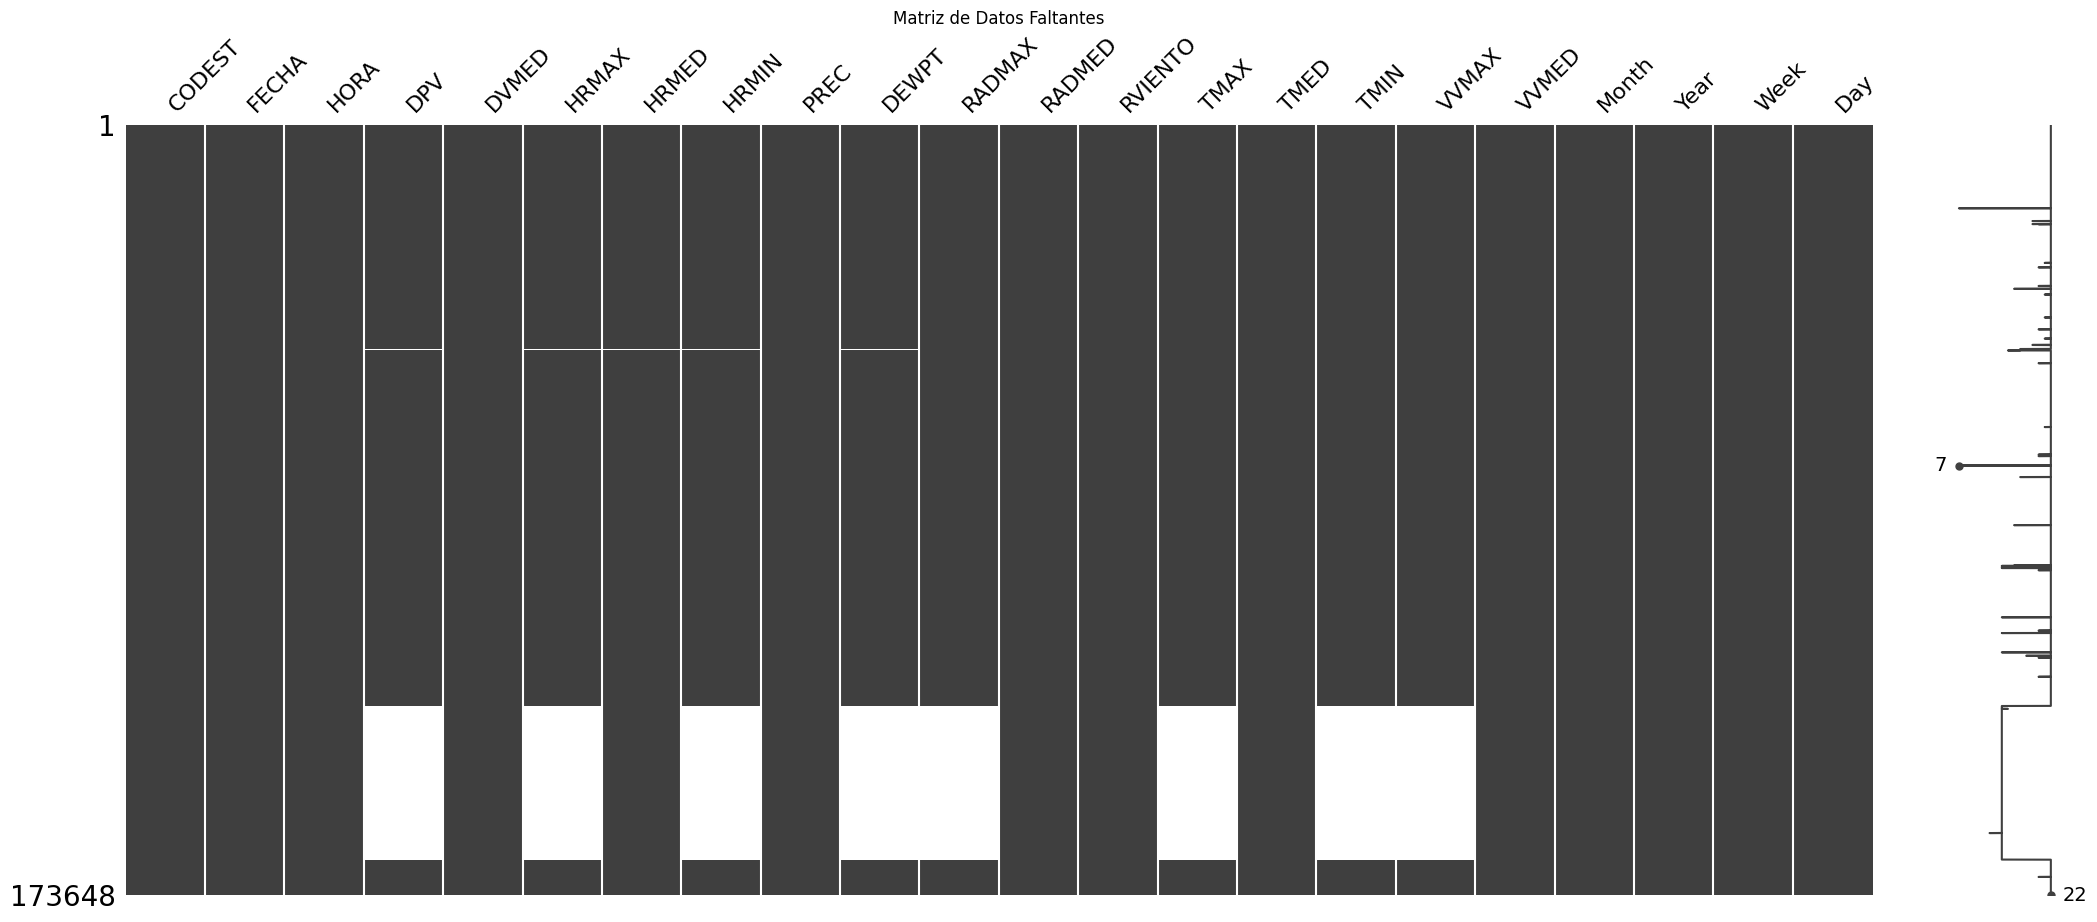

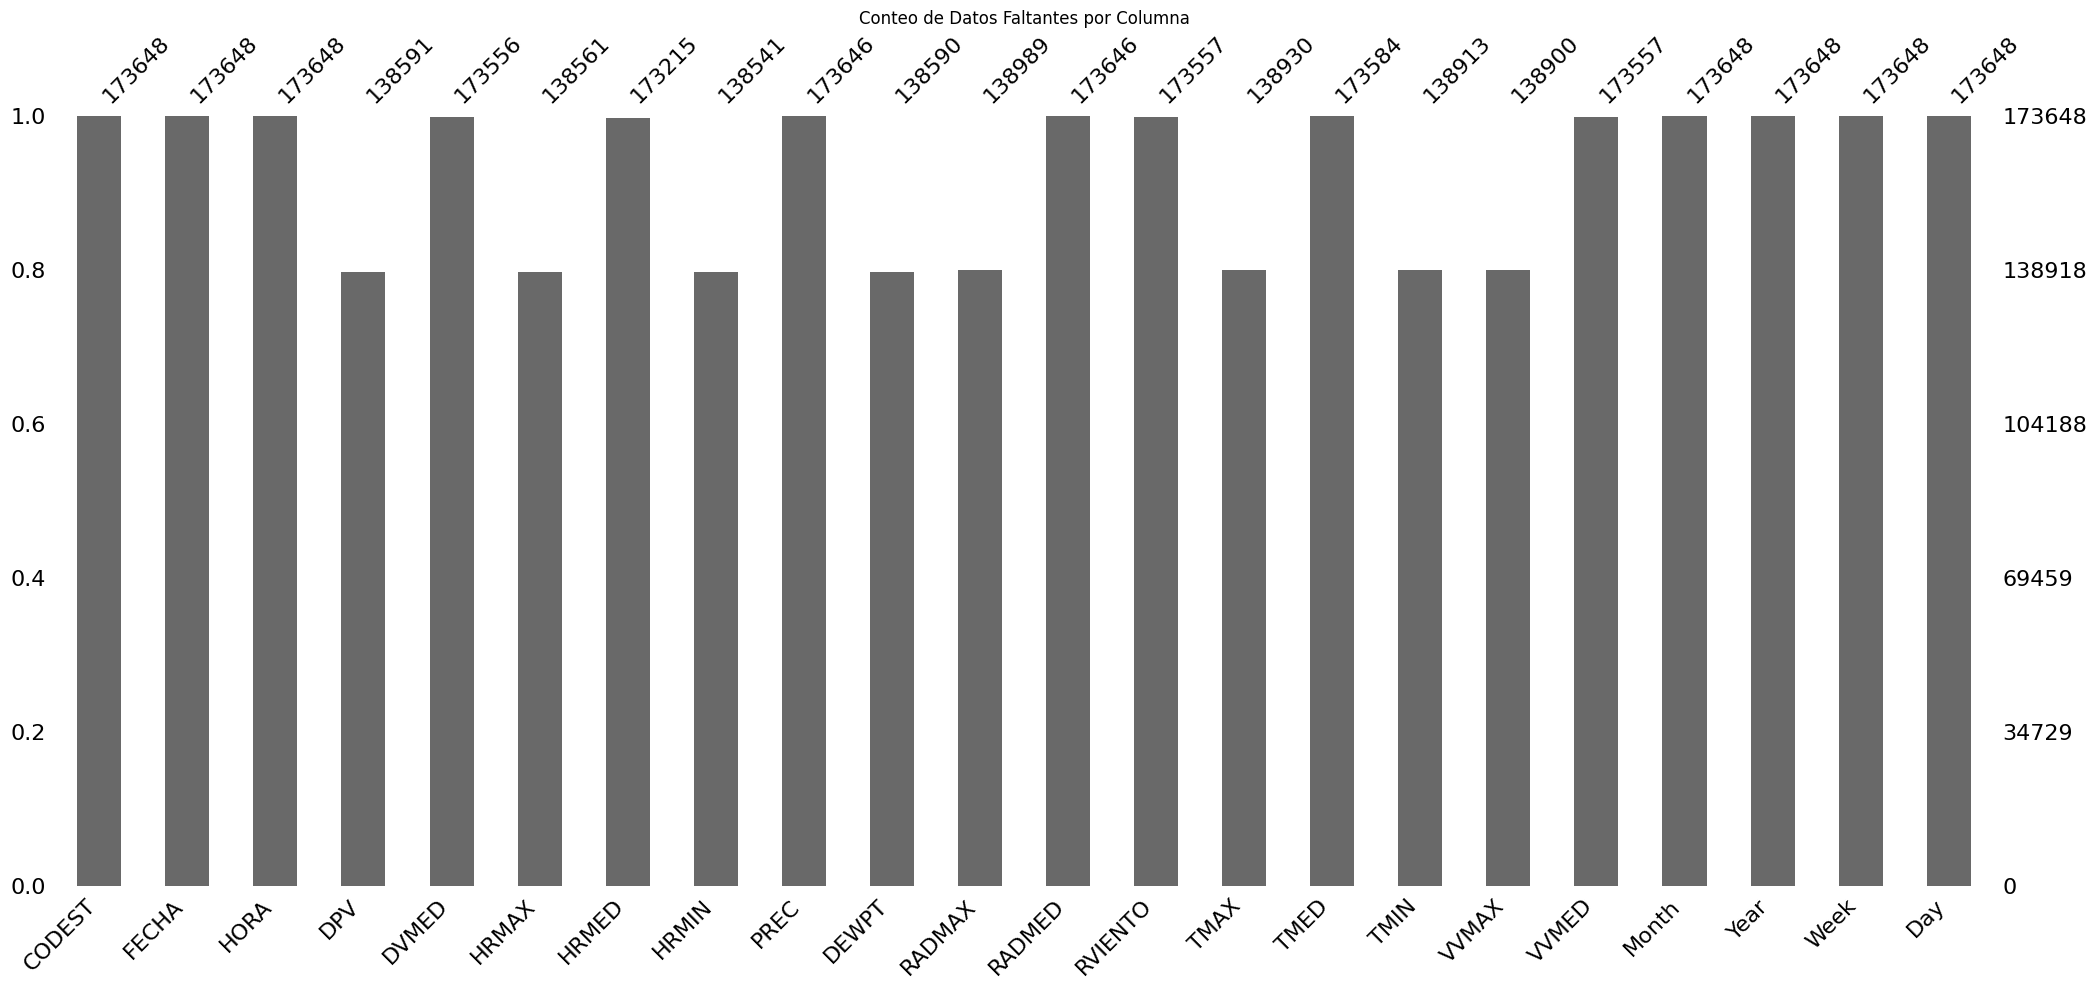

<Figure size 1200x600 with 0 Axes>

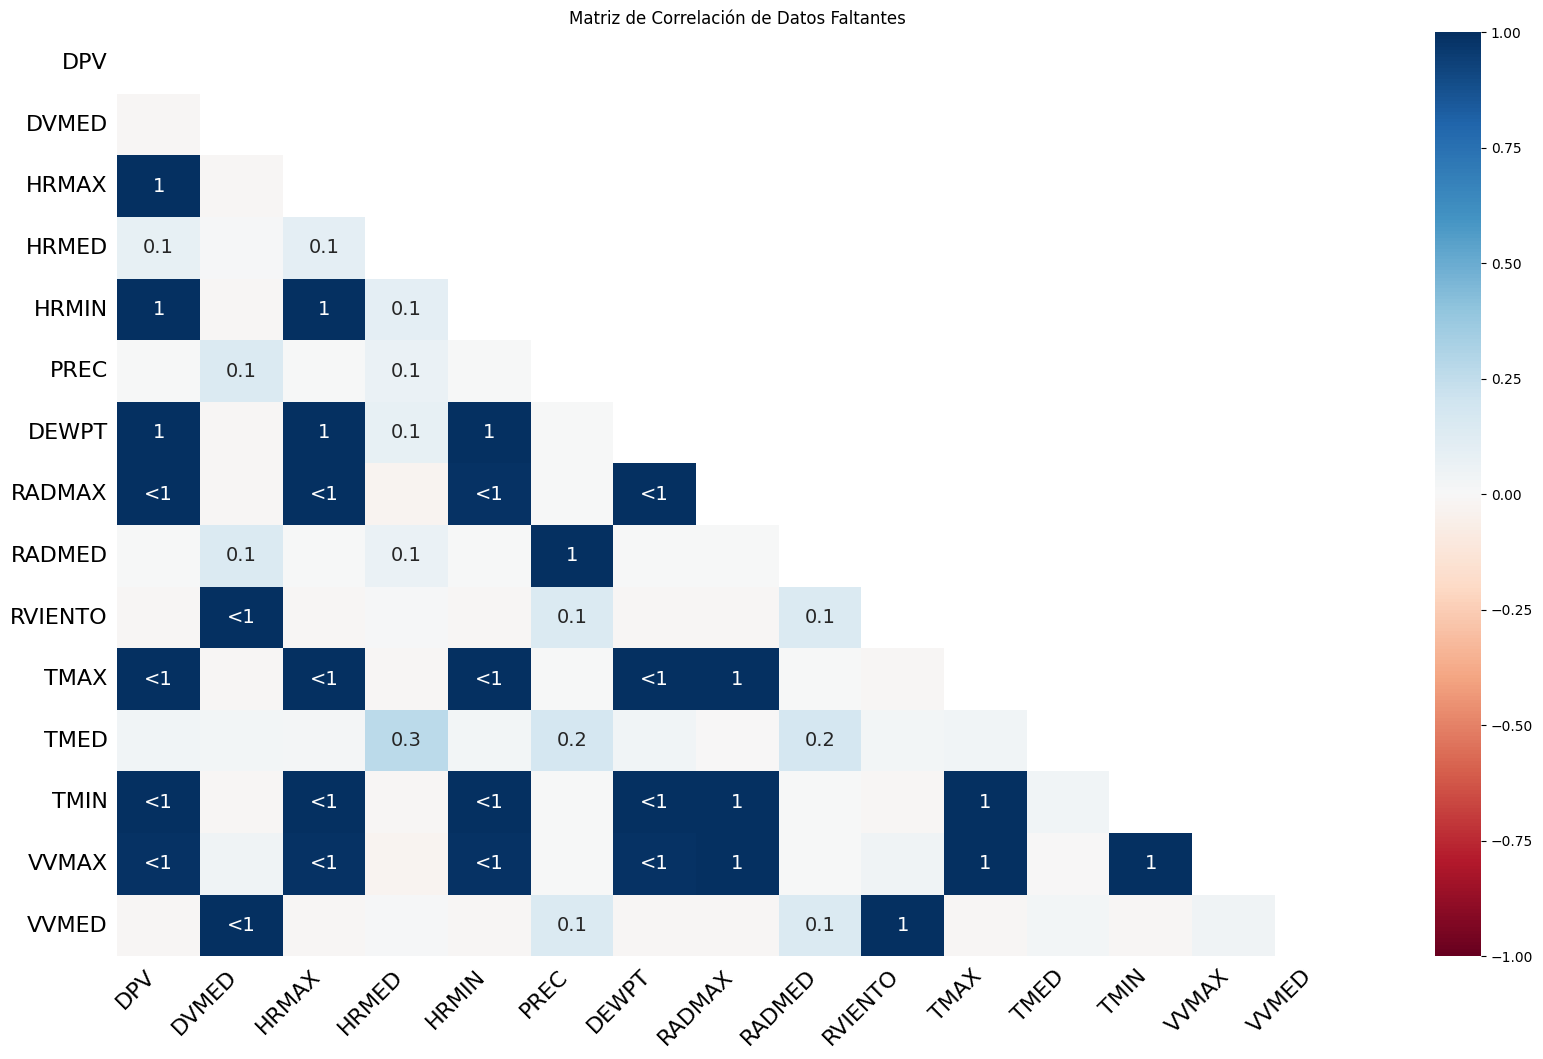

In [16]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualización de la matriz de datos faltantes
plt.figure(figsize=(12, 6))
msno.matrix(df_formateado)
plt.title('Matriz de Datos Faltantes')
plt.show()

# Visualización del gráfico de barras de datos faltantes
plt.figure(figsize=(12, 6))
msno.bar(df_formateado)
plt.title('Conteo de Datos Faltantes por Columna')
plt.show()

# Visualización de la matriz de correlación de datos faltantes
plt.figure(figsize=(12, 6))
msno.heatmap(df_formateado)
plt.title('Matriz de Correlación de Datos Faltantes')
plt.show()

